In [1]:
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

import numpy as np

#import sklearn 

#from numpy import mean
#from numpy import std

from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler

from catboost import CatBoostRegressor

#from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

#from sklearn.metrics import make_scorer

from matplotlib import pyplot
import seaborn as sns

In [2]:
ordinal = pd.read_csv('../../../Data/BaseOrdinal2.csv')
ordinal.shape

(2580, 88)

In [3]:
ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,QA,SqFtPerRoom,Total_Hm_Qual,Total_Bathrooms,HighQualSF
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,3.0,4.0,6.0,2.0,5.0,29.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,0.866028,4.0,9.0,4.0,1,909176150,856,126000,81.46,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,2.0,399.0,0,0,0,0,166,0,0,5136,142.666667,12,2.0,856
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,3.0,2.0,6.0,3.0,1.0,73.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,0.500004,3.0,9.0,4.0,2,905476230,1049,139500,42.00,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1.0,266.0,0,105,0,0,0,0,0,5245,131.125000,10,3.0,1049
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,3.0,2.0,6.0,3.0,5.0,20.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,-0.499998,1.0,9.0,4.0,3,911128020,1001,124900,60.00,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1.0,216.0,154,0,42,86,0,0,0,5005,143.000000,14,1.0,1001


In [4]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 85)

In [5]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'
          }

In [6]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, 
                                  cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [7]:
X = ordinal.drop(['SalePrice'], axis=1).values
y = ordinal.SalePrice.values

In [8]:
X.shape

(2580, 84)

In [9]:
#Scaling did not provide any material model lift. 

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [10]:
#Log Scaling Target Variable, also not much impact to model lift. 
y = np.log10(y)

In [11]:
dfs = evaluate_model(CatBoostRegressor(), X_scaled, y)

Learning rate set to 0.04591
0:	learn: 0.1617006	total: 62.7ms	remaining: 1m 2s
1:	learn: 0.1565817	total: 68.8ms	remaining: 34.3s
2:	learn: 0.1516914	total: 76.2ms	remaining: 25.3s
3:	learn: 0.1472224	total: 84.9ms	remaining: 21.1s
4:	learn: 0.1428747	total: 90.9ms	remaining: 18.1s
5:	learn: 0.1386891	total: 95.6ms	remaining: 15.8s
6:	learn: 0.1346298	total: 101ms	remaining: 14.3s
7:	learn: 0.1308409	total: 109ms	remaining: 13.5s
8:	learn: 0.1273971	total: 119ms	remaining: 13.2s
9:	learn: 0.1237675	total: 126ms	remaining: 12.5s
10:	learn: 0.1202635	total: 133ms	remaining: 12s
11:	learn: 0.1170873	total: 140ms	remaining: 11.5s
12:	learn: 0.1140176	total: 144ms	remaining: 11s
13:	learn: 0.1112785	total: 150ms	remaining: 10.6s
14:	learn: 0.1085902	total: 155ms	remaining: 10.2s
15:	learn: 0.1059772	total: 160ms	remaining: 9.85s
16:	learn: 0.1032669	total: 166ms	remaining: 9.57s
17:	learn: 0.1008917	total: 171ms	remaining: 9.33s
18:	learn: 0.0985563	total: 176ms	remaining: 9.09s
19:	learn:

Learning rate set to 0.04591
0:	learn: 0.1626050	total: 66.2ms	remaining: 1m 6s
1:	learn: 0.1576188	total: 70.8ms	remaining: 35.4s
2:	learn: 0.1528288	total: 80ms	remaining: 26.6s
3:	learn: 0.1484152	total: 87ms	remaining: 21.7s
4:	learn: 0.1439872	total: 92.7ms	remaining: 18.4s
5:	learn: 0.1399314	total: 97.4ms	remaining: 16.1s
6:	learn: 0.1358011	total: 106ms	remaining: 15s
7:	learn: 0.1321501	total: 115ms	remaining: 14.2s
8:	learn: 0.1283296	total: 121ms	remaining: 13.3s
9:	learn: 0.1249454	total: 126ms	remaining: 12.4s
10:	learn: 0.1214304	total: 134ms	remaining: 12s
11:	learn: 0.1180700	total: 139ms	remaining: 11.5s
12:	learn: 0.1150275	total: 151ms	remaining: 11.5s
13:	learn: 0.1121956	total: 157ms	remaining: 11.1s
14:	learn: 0.1093692	total: 168ms	remaining: 11.1s
15:	learn: 0.1068589	total: 173ms	remaining: 10.7s
16:	learn: 0.1042634	total: 180ms	remaining: 10.4s
17:	learn: 0.1017963	total: 185ms	remaining: 10.1s
18:	learn: 0.0994229	total: 194ms	remaining: 10s
19:	learn: 0.097

160:	learn: 0.0402320	total: 1.2s	remaining: 6.26s
161:	learn: 0.0401649	total: 1.21s	remaining: 6.24s
162:	learn: 0.0401165	total: 1.21s	remaining: 6.22s
163:	learn: 0.0400580	total: 1.22s	remaining: 6.2s
164:	learn: 0.0399809	total: 1.22s	remaining: 6.18s
165:	learn: 0.0398914	total: 1.23s	remaining: 6.16s
166:	learn: 0.0398100	total: 1.23s	remaining: 6.14s
167:	learn: 0.0397501	total: 1.24s	remaining: 6.13s
168:	learn: 0.0396828	total: 1.24s	remaining: 6.11s
169:	learn: 0.0395743	total: 1.25s	remaining: 6.09s
170:	learn: 0.0395235	total: 1.25s	remaining: 6.07s
171:	learn: 0.0394412	total: 1.26s	remaining: 6.06s
172:	learn: 0.0393876	total: 1.26s	remaining: 6.05s
173:	learn: 0.0393383	total: 1.27s	remaining: 6.03s
174:	learn: 0.0392362	total: 1.27s	remaining: 6s
175:	learn: 0.0391687	total: 1.28s	remaining: 5.98s
176:	learn: 0.0390673	total: 1.28s	remaining: 5.96s
177:	learn: 0.0390085	total: 1.3s	remaining: 6s
178:	learn: 0.0389361	total: 1.31s	remaining: 5.99s
179:	learn: 0.0388835

160:	learn: 0.0403624	total: 1.26s	remaining: 6.58s
161:	learn: 0.0403069	total: 1.28s	remaining: 6.61s
162:	learn: 0.0401641	total: 1.28s	remaining: 6.59s
163:	learn: 0.0400609	total: 1.29s	remaining: 6.6s
164:	learn: 0.0399818	total: 1.3s	remaining: 6.58s
165:	learn: 0.0398988	total: 1.3s	remaining: 6.55s
166:	learn: 0.0398253	total: 1.31s	remaining: 6.52s
167:	learn: 0.0397665	total: 1.32s	remaining: 6.52s
168:	learn: 0.0397086	total: 1.32s	remaining: 6.5s
169:	learn: 0.0396578	total: 1.33s	remaining: 6.5s
170:	learn: 0.0395141	total: 1.33s	remaining: 6.47s
171:	learn: 0.0394068	total: 1.34s	remaining: 6.47s
172:	learn: 0.0393718	total: 1.36s	remaining: 6.48s
173:	learn: 0.0393055	total: 1.36s	remaining: 6.47s
174:	learn: 0.0392211	total: 1.37s	remaining: 6.46s
175:	learn: 0.0391219	total: 1.38s	remaining: 6.47s
176:	learn: 0.0390542	total: 1.39s	remaining: 6.47s
177:	learn: 0.0389591	total: 1.4s	remaining: 6.45s
178:	learn: 0.0388959	total: 1.4s	remaining: 6.43s
179:	learn: 0.03883

319:	learn: 0.0312202	total: 2.25s	remaining: 4.79s
320:	learn: 0.0311848	total: 2.26s	remaining: 4.78s
321:	learn: 0.0311448	total: 2.27s	remaining: 4.77s
322:	learn: 0.0311053	total: 2.27s	remaining: 4.76s
323:	learn: 0.0310447	total: 2.29s	remaining: 4.78s
324:	learn: 0.0310005	total: 2.29s	remaining: 4.76s
325:	learn: 0.0309677	total: 2.3s	remaining: 4.75s
326:	learn: 0.0309228	total: 2.31s	remaining: 4.75s
327:	learn: 0.0308615	total: 2.31s	remaining: 4.74s
328:	learn: 0.0308520	total: 2.32s	remaining: 4.73s
329:	learn: 0.0308407	total: 2.32s	remaining: 4.72s
330:	learn: 0.0307858	total: 2.33s	remaining: 4.71s
331:	learn: 0.0307259	total: 2.35s	remaining: 4.72s
332:	learn: 0.0306934	total: 2.35s	remaining: 4.71s
333:	learn: 0.0306561	total: 2.36s	remaining: 4.7s
334:	learn: 0.0306228	total: 2.37s	remaining: 4.69s
335:	learn: 0.0305937	total: 2.37s	remaining: 4.69s
336:	learn: 0.0305796	total: 2.38s	remaining: 4.67s
337:	learn: 0.0305506	total: 2.38s	remaining: 4.67s
338:	learn: 0.

319:	learn: 0.0307405	total: 2.45s	remaining: 5.2s
320:	learn: 0.0307063	total: 2.45s	remaining: 5.19s
321:	learn: 0.0306627	total: 2.46s	remaining: 5.19s
322:	learn: 0.0306043	total: 2.48s	remaining: 5.19s
323:	learn: 0.0305644	total: 2.48s	remaining: 5.18s
324:	learn: 0.0305162	total: 2.49s	remaining: 5.17s
325:	learn: 0.0304616	total: 2.5s	remaining: 5.17s
326:	learn: 0.0304262	total: 2.51s	remaining: 5.17s
327:	learn: 0.0303610	total: 2.53s	remaining: 5.19s
328:	learn: 0.0303264	total: 2.54s	remaining: 5.17s
329:	learn: 0.0302933	total: 2.54s	remaining: 5.17s
330:	learn: 0.0302569	total: 2.55s	remaining: 5.16s
331:	learn: 0.0302358	total: 2.56s	remaining: 5.15s
332:	learn: 0.0302030	total: 2.57s	remaining: 5.16s
333:	learn: 0.0301939	total: 2.58s	remaining: 5.15s
334:	learn: 0.0301455	total: 2.59s	remaining: 5.14s
335:	learn: 0.0300800	total: 2.6s	remaining: 5.13s
336:	learn: 0.0300467	total: 2.6s	remaining: 5.12s
337:	learn: 0.0300075	total: 2.61s	remaining: 5.12s
338:	learn: 0.02

478:	learn: 0.0260396	total: 3.55s	remaining: 3.86s
479:	learn: 0.0260260	total: 3.56s	remaining: 3.85s
480:	learn: 0.0260059	total: 3.56s	remaining: 3.84s
481:	learn: 0.0259748	total: 3.58s	remaining: 3.84s
482:	learn: 0.0259602	total: 3.58s	remaining: 3.83s
483:	learn: 0.0259332	total: 3.59s	remaining: 3.83s
484:	learn: 0.0259121	total: 3.6s	remaining: 3.82s
485:	learn: 0.0258834	total: 3.6s	remaining: 3.81s
486:	learn: 0.0258462	total: 3.6s	remaining: 3.8s
487:	learn: 0.0258168	total: 3.61s	remaining: 3.79s
488:	learn: 0.0257994	total: 3.62s	remaining: 3.78s
489:	learn: 0.0257723	total: 3.63s	remaining: 3.78s
490:	learn: 0.0257231	total: 3.65s	remaining: 3.78s
491:	learn: 0.0257181	total: 3.65s	remaining: 3.77s
492:	learn: 0.0256979	total: 3.66s	remaining: 3.76s
493:	learn: 0.0256780	total: 3.67s	remaining: 3.76s
494:	learn: 0.0256553	total: 3.68s	remaining: 3.75s
495:	learn: 0.0256321	total: 3.69s	remaining: 3.75s
496:	learn: 0.0256124	total: 3.71s	remaining: 3.75s
497:	learn: 0.02

478:	learn: 0.0253145	total: 3.74s	remaining: 4.07s
479:	learn: 0.0252942	total: 3.75s	remaining: 4.06s
480:	learn: 0.0252458	total: 3.76s	remaining: 4.05s
481:	learn: 0.0252423	total: 3.76s	remaining: 4.04s
482:	learn: 0.0252094	total: 3.77s	remaining: 4.04s
483:	learn: 0.0251743	total: 3.78s	remaining: 4.03s
484:	learn: 0.0251398	total: 3.78s	remaining: 4.02s
485:	learn: 0.0251094	total: 3.79s	remaining: 4.01s
486:	learn: 0.0250808	total: 3.8s	remaining: 4s
487:	learn: 0.0250503	total: 3.8s	remaining: 3.99s
488:	learn: 0.0250182	total: 3.81s	remaining: 3.98s
489:	learn: 0.0249702	total: 3.81s	remaining: 3.97s
490:	learn: 0.0249375	total: 3.83s	remaining: 3.96s
491:	learn: 0.0249181	total: 3.83s	remaining: 3.96s
492:	learn: 0.0248868	total: 3.84s	remaining: 3.95s
493:	learn: 0.0248540	total: 3.85s	remaining: 3.94s
494:	learn: 0.0248299	total: 3.85s	remaining: 3.93s
495:	learn: 0.0248199	total: 3.87s	remaining: 3.93s
496:	learn: 0.0247839	total: 3.87s	remaining: 3.92s
497:	learn: 0.024

637:	learn: 0.0224222	total: 4.64s	remaining: 2.63s
638:	learn: 0.0223926	total: 4.65s	remaining: 2.63s
639:	learn: 0.0223745	total: 4.65s	remaining: 2.62s
640:	learn: 0.0223718	total: 4.66s	remaining: 2.61s
641:	learn: 0.0223508	total: 4.66s	remaining: 2.6s
642:	learn: 0.0223489	total: 4.67s	remaining: 2.59s
643:	learn: 0.0223279	total: 4.68s	remaining: 2.59s
644:	learn: 0.0223065	total: 4.68s	remaining: 2.58s
645:	learn: 0.0222751	total: 4.69s	remaining: 2.57s
646:	learn: 0.0222459	total: 4.7s	remaining: 2.56s
647:	learn: 0.0222148	total: 4.71s	remaining: 2.56s
648:	learn: 0.0221919	total: 4.71s	remaining: 2.55s
649:	learn: 0.0221832	total: 4.72s	remaining: 2.54s
650:	learn: 0.0221610	total: 4.72s	remaining: 2.53s
651:	learn: 0.0221392	total: 4.72s	remaining: 2.52s
652:	learn: 0.0221372	total: 4.73s	remaining: 2.52s
653:	learn: 0.0221092	total: 4.74s	remaining: 2.51s
654:	learn: 0.0220891	total: 4.75s	remaining: 2.5s
655:	learn: 0.0220860	total: 4.75s	remaining: 2.49s
656:	learn: 0.0

637:	learn: 0.0221580	total: 4.56s	remaining: 2.59s
638:	learn: 0.0221403	total: 4.57s	remaining: 2.58s
639:	learn: 0.0221228	total: 4.57s	remaining: 2.57s
640:	learn: 0.0220935	total: 4.58s	remaining: 2.56s
641:	learn: 0.0220914	total: 4.58s	remaining: 2.56s
642:	learn: 0.0220646	total: 4.59s	remaining: 2.55s
643:	learn: 0.0220422	total: 4.6s	remaining: 2.54s
644:	learn: 0.0220233	total: 4.6s	remaining: 2.53s
645:	learn: 0.0219973	total: 4.61s	remaining: 2.53s
646:	learn: 0.0219808	total: 4.62s	remaining: 2.52s
647:	learn: 0.0219646	total: 4.62s	remaining: 2.51s
648:	learn: 0.0219375	total: 4.63s	remaining: 2.5s
649:	learn: 0.0219249	total: 4.63s	remaining: 2.5s
650:	learn: 0.0218989	total: 4.64s	remaining: 2.49s
651:	learn: 0.0218806	total: 4.65s	remaining: 2.48s
652:	learn: 0.0218580	total: 4.65s	remaining: 2.47s
653:	learn: 0.0218373	total: 4.66s	remaining: 2.47s
654:	learn: 0.0218080	total: 4.67s	remaining: 2.46s
655:	learn: 0.0217821	total: 4.67s	remaining: 2.45s
656:	learn: 0.02

637:	learn: 0.0212134	total: 4.97s	remaining: 2.82s
638:	learn: 0.0211974	total: 4.98s	remaining: 2.81s
639:	learn: 0.0211601	total: 4.99s	remaining: 2.8s
640:	learn: 0.0211391	total: 5s	remaining: 2.8s
641:	learn: 0.0211202	total: 5.01s	remaining: 2.79s
642:	learn: 0.0210955	total: 5.01s	remaining: 2.78s
643:	learn: 0.0210656	total: 5.03s	remaining: 2.78s
644:	learn: 0.0210384	total: 5.03s	remaining: 2.77s
645:	learn: 0.0210110	total: 5.04s	remaining: 2.76s
646:	learn: 0.0209856	total: 5.05s	remaining: 2.75s
647:	learn: 0.0209689	total: 5.05s	remaining: 2.75s
648:	learn: 0.0209379	total: 5.07s	remaining: 2.74s
649:	learn: 0.0209027	total: 5.08s	remaining: 2.73s
650:	learn: 0.0208749	total: 5.08s	remaining: 2.72s
651:	learn: 0.0208534	total: 5.09s	remaining: 2.71s
652:	learn: 0.0208307	total: 5.09s	remaining: 2.71s
653:	learn: 0.0208104	total: 5.1s	remaining: 2.7s
654:	learn: 0.0207954	total: 5.1s	remaining: 2.69s
655:	learn: 0.0207710	total: 5.11s	remaining: 2.68s
656:	learn: 0.020769

796:	learn: 0.0187871	total: 5.85s	remaining: 1.49s
797:	learn: 0.0187624	total: 5.86s	remaining: 1.48s
798:	learn: 0.0187459	total: 5.87s	remaining: 1.48s
799:	learn: 0.0187355	total: 5.87s	remaining: 1.47s
800:	learn: 0.0187185	total: 5.88s	remaining: 1.46s
801:	learn: 0.0186934	total: 5.89s	remaining: 1.45s
802:	learn: 0.0186703	total: 5.89s	remaining: 1.45s
803:	learn: 0.0186599	total: 5.91s	remaining: 1.44s
804:	learn: 0.0186440	total: 5.91s	remaining: 1.43s
805:	learn: 0.0186209	total: 5.92s	remaining: 1.42s
806:	learn: 0.0186008	total: 5.92s	remaining: 1.42s
807:	learn: 0.0185846	total: 5.93s	remaining: 1.41s
808:	learn: 0.0185695	total: 5.93s	remaining: 1.4s
809:	learn: 0.0185478	total: 5.94s	remaining: 1.39s
810:	learn: 0.0185315	total: 5.95s	remaining: 1.39s
811:	learn: 0.0185250	total: 5.96s	remaining: 1.38s
812:	learn: 0.0185068	total: 5.96s	remaining: 1.37s
813:	learn: 0.0184870	total: 5.98s	remaining: 1.36s
814:	learn: 0.0184702	total: 5.98s	remaining: 1.36s
815:	learn: 0

796:	learn: 0.0189210	total: 5.69s	remaining: 1.45s
797:	learn: 0.0189094	total: 5.7s	remaining: 1.44s
798:	learn: 0.0188973	total: 5.7s	remaining: 1.43s
799:	learn: 0.0188851	total: 5.7s	remaining: 1.43s
800:	learn: 0.0188676	total: 5.71s	remaining: 1.42s
801:	learn: 0.0188570	total: 5.72s	remaining: 1.41s
802:	learn: 0.0188411	total: 5.73s	remaining: 1.41s
803:	learn: 0.0188329	total: 5.74s	remaining: 1.4s
804:	learn: 0.0188188	total: 5.75s	remaining: 1.39s
805:	learn: 0.0187930	total: 5.75s	remaining: 1.38s
806:	learn: 0.0187734	total: 5.76s	remaining: 1.38s
807:	learn: 0.0187418	total: 5.77s	remaining: 1.37s
808:	learn: 0.0187231	total: 5.77s	remaining: 1.36s
809:	learn: 0.0187005	total: 5.78s	remaining: 1.35s
810:	learn: 0.0186729	total: 5.79s	remaining: 1.35s
811:	learn: 0.0186530	total: 5.79s	remaining: 1.34s
812:	learn: 0.0186303	total: 5.8s	remaining: 1.33s
813:	learn: 0.0186105	total: 5.81s	remaining: 1.33s
814:	learn: 0.0185797	total: 5.81s	remaining: 1.32s
815:	learn: 0.018

955:	learn: 0.0170874	total: 6.83s	remaining: 314ms
956:	learn: 0.0170776	total: 6.84s	remaining: 307ms
957:	learn: 0.0170711	total: 6.85s	remaining: 300ms
958:	learn: 0.0170594	total: 6.86s	remaining: 293ms
959:	learn: 0.0170472	total: 6.87s	remaining: 286ms
960:	learn: 0.0170427	total: 6.87s	remaining: 279ms
961:	learn: 0.0170192	total: 6.88s	remaining: 272ms
962:	learn: 0.0169989	total: 6.89s	remaining: 265ms
963:	learn: 0.0169817	total: 6.9s	remaining: 258ms
964:	learn: 0.0169615	total: 6.9s	remaining: 250ms
965:	learn: 0.0169522	total: 6.91s	remaining: 243ms
966:	learn: 0.0169394	total: 6.91s	remaining: 236ms
967:	learn: 0.0169215	total: 6.92s	remaining: 229ms
968:	learn: 0.0169009	total: 6.93s	remaining: 222ms
969:	learn: 0.0168927	total: 6.93s	remaining: 214ms
970:	learn: 0.0168785	total: 6.94s	remaining: 207ms
971:	learn: 0.0168730	total: 6.94s	remaining: 200ms
972:	learn: 0.0168629	total: 6.95s	remaining: 193ms
973:	learn: 0.0168438	total: 6.96s	remaining: 186ms
974:	learn: 0.

955:	learn: 0.0163345	total: 7.13s	remaining: 328ms
956:	learn: 0.0163211	total: 7.14s	remaining: 321ms
957:	learn: 0.0163029	total: 7.16s	remaining: 314ms
958:	learn: 0.0162928	total: 7.18s	remaining: 307ms
959:	learn: 0.0162868	total: 7.19s	remaining: 300ms
960:	learn: 0.0162723	total: 7.21s	remaining: 293ms
961:	learn: 0.0162569	total: 7.22s	remaining: 285ms
962:	learn: 0.0162486	total: 7.23s	remaining: 278ms
963:	learn: 0.0162261	total: 7.24s	remaining: 270ms
964:	learn: 0.0162154	total: 7.24s	remaining: 263ms
965:	learn: 0.0161946	total: 7.25s	remaining: 255ms
966:	learn: 0.0161846	total: 7.26s	remaining: 248ms
967:	learn: 0.0161660	total: 7.28s	remaining: 241ms
968:	learn: 0.0161605	total: 7.3s	remaining: 233ms
969:	learn: 0.0161475	total: 7.31s	remaining: 226ms
970:	learn: 0.0161449	total: 7.31s	remaining: 218ms
971:	learn: 0.0161341	total: 7.32s	remaining: 211ms
972:	learn: 0.0161293	total: 7.33s	remaining: 203ms
973:	learn: 0.0161176	total: 7.33s	remaining: 196ms
974:	learn: 0

115:	learn: 0.0430032	total: 775ms	remaining: 5.91s
116:	learn: 0.0429090	total: 781ms	remaining: 5.89s
117:	learn: 0.0427691	total: 788ms	remaining: 5.89s
118:	learn: 0.0426654	total: 792ms	remaining: 5.87s
119:	learn: 0.0425774	total: 797ms	remaining: 5.84s
120:	learn: 0.0424580	total: 801ms	remaining: 5.82s
121:	learn: 0.0423773	total: 807ms	remaining: 5.81s
122:	learn: 0.0422992	total: 815ms	remaining: 5.81s
123:	learn: 0.0422040	total: 819ms	remaining: 5.79s
124:	learn: 0.0421278	total: 824ms	remaining: 5.77s
125:	learn: 0.0420301	total: 831ms	remaining: 5.76s
126:	learn: 0.0419157	total: 836ms	remaining: 5.75s
127:	learn: 0.0418216	total: 841ms	remaining: 5.73s
128:	learn: 0.0417506	total: 846ms	remaining: 5.71s
129:	learn: 0.0416767	total: 852ms	remaining: 5.71s
130:	learn: 0.0415572	total: 859ms	remaining: 5.7s
131:	learn: 0.0415099	total: 865ms	remaining: 5.69s
132:	learn: 0.0414314	total: 870ms	remaining: 5.67s
133:	learn: 0.0412989	total: 880ms	remaining: 5.69s
134:	learn: 0

115:	learn: 0.0433659	total: 712ms	remaining: 5.42s
116:	learn: 0.0432706	total: 720ms	remaining: 5.43s
117:	learn: 0.0432113	total: 726ms	remaining: 5.43s
118:	learn: 0.0431097	total: 735ms	remaining: 5.44s
119:	learn: 0.0430242	total: 742ms	remaining: 5.44s
120:	learn: 0.0428918	total: 751ms	remaining: 5.46s
121:	learn: 0.0428203	total: 755ms	remaining: 5.43s
122:	learn: 0.0427019	total: 760ms	remaining: 5.42s
123:	learn: 0.0426084	total: 766ms	remaining: 5.41s
124:	learn: 0.0425120	total: 771ms	remaining: 5.4s
125:	learn: 0.0424057	total: 775ms	remaining: 5.37s
126:	learn: 0.0423411	total: 780ms	remaining: 5.37s
127:	learn: 0.0422498	total: 787ms	remaining: 5.36s
128:	learn: 0.0421306	total: 792ms	remaining: 5.35s
129:	learn: 0.0420277	total: 802ms	remaining: 5.36s
130:	learn: 0.0419283	total: 810ms	remaining: 5.38s
131:	learn: 0.0418349	total: 815ms	remaining: 5.36s
132:	learn: 0.0417489	total: 819ms	remaining: 5.34s
133:	learn: 0.0416500	total: 825ms	remaining: 5.33s
134:	learn: 0

274:	learn: 0.0323553	total: 1.72s	remaining: 4.52s
275:	learn: 0.0322978	total: 1.72s	remaining: 4.52s
276:	learn: 0.0322848	total: 1.73s	remaining: 4.51s
277:	learn: 0.0322734	total: 1.73s	remaining: 4.5s
278:	learn: 0.0322205	total: 1.74s	remaining: 4.48s
279:	learn: 0.0321499	total: 1.74s	remaining: 4.48s
280:	learn: 0.0320894	total: 1.75s	remaining: 4.48s
281:	learn: 0.0320512	total: 1.76s	remaining: 4.47s
282:	learn: 0.0320428	total: 1.76s	remaining: 4.46s
283:	learn: 0.0319985	total: 1.76s	remaining: 4.45s
284:	learn: 0.0319439	total: 1.77s	remaining: 4.45s
285:	learn: 0.0318899	total: 1.78s	remaining: 4.44s
286:	learn: 0.0318334	total: 1.79s	remaining: 4.44s
287:	learn: 0.0317838	total: 1.79s	remaining: 4.43s
288:	learn: 0.0317582	total: 1.8s	remaining: 4.42s
289:	learn: 0.0317146	total: 1.8s	remaining: 4.42s
290:	learn: 0.0316840	total: 1.81s	remaining: 4.41s
291:	learn: 0.0316327	total: 1.81s	remaining: 4.4s
292:	learn: 0.0315622	total: 1.82s	remaining: 4.39s
293:	learn: 0.03

274:	learn: 0.0334909	total: 1.6s	remaining: 4.23s
275:	learn: 0.0334317	total: 1.61s	remaining: 4.22s
276:	learn: 0.0333564	total: 1.62s	remaining: 4.22s
277:	learn: 0.0333012	total: 1.62s	remaining: 4.21s
278:	learn: 0.0332633	total: 1.63s	remaining: 4.21s
279:	learn: 0.0332133	total: 1.64s	remaining: 4.21s
280:	learn: 0.0331868	total: 1.64s	remaining: 4.2s
281:	learn: 0.0331404	total: 1.65s	remaining: 4.19s
282:	learn: 0.0330907	total: 1.65s	remaining: 4.18s
283:	learn: 0.0330528	total: 1.66s	remaining: 4.18s
284:	learn: 0.0330083	total: 1.66s	remaining: 4.17s
285:	learn: 0.0329661	total: 1.67s	remaining: 4.16s
286:	learn: 0.0329099	total: 1.67s	remaining: 4.15s
287:	learn: 0.0328578	total: 1.67s	remaining: 4.14s
288:	learn: 0.0328114	total: 1.68s	remaining: 4.13s
289:	learn: 0.0327822	total: 1.69s	remaining: 4.13s
290:	learn: 0.0327457	total: 1.69s	remaining: 4.12s
291:	learn: 0.0327302	total: 1.7s	remaining: 4.12s
292:	learn: 0.0326606	total: 1.7s	remaining: 4.11s
293:	learn: 0.03

433:	learn: 0.0263566	total: 2.62s	remaining: 3.42s
434:	learn: 0.0263313	total: 2.63s	remaining: 3.41s
435:	learn: 0.0263269	total: 2.63s	remaining: 3.4s
436:	learn: 0.0262992	total: 2.64s	remaining: 3.4s
437:	learn: 0.0262716	total: 2.64s	remaining: 3.39s
438:	learn: 0.0262498	total: 2.65s	remaining: 3.38s
439:	learn: 0.0262292	total: 2.65s	remaining: 3.38s
440:	learn: 0.0262018	total: 2.66s	remaining: 3.37s
441:	learn: 0.0261698	total: 2.66s	remaining: 3.36s
442:	learn: 0.0261361	total: 2.67s	remaining: 3.36s
443:	learn: 0.0261193	total: 2.68s	remaining: 3.35s
444:	learn: 0.0260975	total: 2.68s	remaining: 3.34s
445:	learn: 0.0260653	total: 2.69s	remaining: 3.34s
446:	learn: 0.0260373	total: 2.7s	remaining: 3.33s
447:	learn: 0.0260068	total: 2.7s	remaining: 3.33s
448:	learn: 0.0259810	total: 2.7s	remaining: 3.32s
449:	learn: 0.0259416	total: 2.71s	remaining: 3.31s
450:	learn: 0.0259107	total: 2.71s	remaining: 3.31s
451:	learn: 0.0258834	total: 2.72s	remaining: 3.3s
452:	learn: 0.0258

433:	learn: 0.0276731	total: 2.55s	remaining: 3.32s
434:	learn: 0.0276440	total: 2.56s	remaining: 3.32s
435:	learn: 0.0276144	total: 2.56s	remaining: 3.31s
436:	learn: 0.0275865	total: 2.57s	remaining: 3.31s
437:	learn: 0.0275750	total: 2.57s	remaining: 3.3s
438:	learn: 0.0275598	total: 2.58s	remaining: 3.3s
439:	learn: 0.0275196	total: 2.59s	remaining: 3.29s
440:	learn: 0.0274885	total: 2.59s	remaining: 3.29s
441:	learn: 0.0274598	total: 2.6s	remaining: 3.28s
442:	learn: 0.0274550	total: 2.6s	remaining: 3.27s
443:	learn: 0.0274350	total: 2.6s	remaining: 3.26s
444:	learn: 0.0273926	total: 2.61s	remaining: 3.26s
445:	learn: 0.0273380	total: 2.62s	remaining: 3.25s
446:	learn: 0.0273059	total: 2.62s	remaining: 3.24s
447:	learn: 0.0272890	total: 2.63s	remaining: 3.24s
448:	learn: 0.0272698	total: 2.63s	remaining: 3.23s
449:	learn: 0.0272542	total: 2.64s	remaining: 3.23s
450:	learn: 0.0272453	total: 2.65s	remaining: 3.22s
451:	learn: 0.0272338	total: 2.65s	remaining: 3.21s
452:	learn: 0.027

592:	learn: 0.0235896	total: 3.56s	remaining: 2.44s
593:	learn: 0.0235666	total: 3.57s	remaining: 2.44s
594:	learn: 0.0235343	total: 3.57s	remaining: 2.43s
595:	learn: 0.0235060	total: 3.58s	remaining: 2.42s
596:	learn: 0.0234837	total: 3.58s	remaining: 2.42s
597:	learn: 0.0234601	total: 3.59s	remaining: 2.41s
598:	learn: 0.0234413	total: 3.59s	remaining: 2.4s
599:	learn: 0.0234050	total: 3.6s	remaining: 2.4s
600:	learn: 0.0233734	total: 3.61s	remaining: 2.4s
601:	learn: 0.0233543	total: 3.62s	remaining: 2.39s
602:	learn: 0.0233303	total: 3.62s	remaining: 2.38s
603:	learn: 0.0233179	total: 3.63s	remaining: 2.38s
604:	learn: 0.0232874	total: 3.63s	remaining: 2.37s
605:	learn: 0.0232762	total: 3.64s	remaining: 2.37s
606:	learn: 0.0232682	total: 3.65s	remaining: 2.36s
607:	learn: 0.0232448	total: 3.65s	remaining: 2.36s
608:	learn: 0.0232185	total: 3.67s	remaining: 2.35s
609:	learn: 0.0231804	total: 3.67s	remaining: 2.35s
610:	learn: 0.0231731	total: 3.67s	remaining: 2.34s
611:	learn: 0.02

592:	learn: 0.0236451	total: 3.48s	remaining: 2.38s
593:	learn: 0.0236134	total: 3.48s	remaining: 2.38s
594:	learn: 0.0235821	total: 3.49s	remaining: 2.37s
595:	learn: 0.0235583	total: 3.49s	remaining: 2.37s
596:	learn: 0.0235370	total: 3.5s	remaining: 2.36s
597:	learn: 0.0235151	total: 3.51s	remaining: 2.36s
598:	learn: 0.0234919	total: 3.52s	remaining: 2.35s
599:	learn: 0.0234650	total: 3.52s	remaining: 2.35s
600:	learn: 0.0234386	total: 3.52s	remaining: 2.34s
601:	learn: 0.0234063	total: 3.53s	remaining: 2.33s
602:	learn: 0.0234038	total: 3.53s	remaining: 2.33s
603:	learn: 0.0233823	total: 3.54s	remaining: 2.32s
604:	learn: 0.0233558	total: 3.54s	remaining: 2.31s
605:	learn: 0.0233537	total: 3.55s	remaining: 2.31s
606:	learn: 0.0233252	total: 3.55s	remaining: 2.3s
607:	learn: 0.0233048	total: 3.56s	remaining: 2.29s
608:	learn: 0.0232739	total: 3.56s	remaining: 2.29s
609:	learn: 0.0232474	total: 3.57s	remaining: 2.28s
610:	learn: 0.0232302	total: 3.58s	remaining: 2.28s
611:	learn: 0.

432:	learn: 0.0273588	total: 3.88s	remaining: 5.08s
433:	learn: 0.0273369	total: 3.89s	remaining: 5.07s
434:	learn: 0.0272999	total: 3.91s	remaining: 5.08s
435:	learn: 0.0272645	total: 3.92s	remaining: 5.07s
436:	learn: 0.0272239	total: 3.93s	remaining: 5.06s
437:	learn: 0.0271708	total: 3.94s	remaining: 5.06s
438:	learn: 0.0271271	total: 3.95s	remaining: 5.05s
439:	learn: 0.0270908	total: 3.96s	remaining: 5.05s
440:	learn: 0.0270503	total: 3.98s	remaining: 5.04s
441:	learn: 0.0270173	total: 3.99s	remaining: 5.04s
442:	learn: 0.0269898	total: 4s	remaining: 5.03s
443:	learn: 0.0269560	total: 4.01s	remaining: 5.02s
444:	learn: 0.0269343	total: 4.02s	remaining: 5.02s
445:	learn: 0.0269286	total: 4.03s	remaining: 5s
446:	learn: 0.0268951	total: 4.04s	remaining: 5s
447:	learn: 0.0268458	total: 4.05s	remaining: 5s
448:	learn: 0.0268416	total: 4.07s	remaining: 4.99s
449:	learn: 0.0268147	total: 4.08s	remaining: 4.99s
450:	learn: 0.0267790	total: 4.09s	remaining: 4.98s
451:	learn: 0.0267504	to

591:	learn: 0.0230890	total: 5.79s	remaining: 3.99s
592:	learn: 0.0230701	total: 5.8s	remaining: 3.98s
593:	learn: 0.0230517	total: 5.81s	remaining: 3.97s
594:	learn: 0.0230350	total: 5.82s	remaining: 3.96s
595:	learn: 0.0230327	total: 5.83s	remaining: 3.95s
596:	learn: 0.0230190	total: 5.84s	remaining: 3.94s
597:	learn: 0.0229951	total: 5.85s	remaining: 3.93s
598:	learn: 0.0229739	total: 5.87s	remaining: 3.93s
599:	learn: 0.0229427	total: 5.87s	remaining: 3.91s
600:	learn: 0.0229204	total: 5.88s	remaining: 3.9s
601:	learn: 0.0228962	total: 5.88s	remaining: 3.89s
602:	learn: 0.0228771	total: 5.89s	remaining: 3.88s
603:	learn: 0.0228577	total: 5.89s	remaining: 3.86s
604:	learn: 0.0228481	total: 5.89s	remaining: 3.85s
605:	learn: 0.0228228	total: 5.9s	remaining: 3.83s
606:	learn: 0.0228076	total: 5.9s	remaining: 3.82s
607:	learn: 0.0227911	total: 5.91s	remaining: 3.81s
608:	learn: 0.0227585	total: 5.91s	remaining: 3.79s
609:	learn: 0.0227307	total: 5.91s	remaining: 3.78s
610:	learn: 0.02

In [12]:
cat_df = dfs[['test_r2', 'test_neg_mae']]
cat_df = cat_df.assign(MAE = cat_df['test_neg_mae'].abs())
cat_df = cat_df.rename(columns = {'test_r2':'Cat R2', 'MAE':'Cat MAE'})
cat_df

,Cat R2,test_neg_mae,Cat MAE
0,0.928912,-0.030206,0.030206
1,0.918531,-0.032220,0.032220
2,0.904114,-0.031247,0.031247
3,0.925904,-0.029754,0.029754
4,0.942902,-0.028062,0.028062
5,0.928913,-0.031676,0.031676
6,0.939004,-0.028878,0.028878
7,0.928609,-0.029138,0.029138
8,0.910444,-0.030414,0.030414
9,0.918436,-0.031256,0.031256


In [13]:
cat_df.describe()

,Cat R2,test_neg_mae,Cat MAE
count,15.000000,15.000000,15.000000
mean,0.924423,-0.030194,0.030194
std,0.013093,0.001454,0.001454
min,0.904114,-0.032396,0.027926
25%,0.913501,-0.031264,0.029008
50%,0.925904,-0.030206,0.030206
75%,0.933959,-0.029008,0.031264
max,0.944119,-0.027926,0.032396


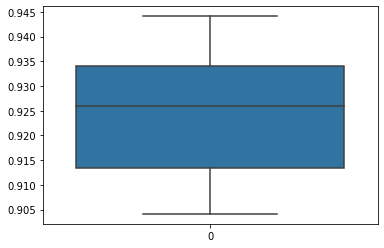

In [14]:
sns.boxplot(data=cat_df['Cat R2']);